In [30]:
import pandas as pd

In [2]:
df = pd.read_csv("play_freq.csv")

In [3]:
df.head()

,uid,song_id,play_frequency
0,168529700.0,4068248.0,2
1,168529682.0,1719574.0,8
2,168529704.0,23491875.0,1
3,153901397.0,4310520.0,3
4,168529900.0,4117304.0,3


In [84]:
df.describe()

,uid,song_id,play_frequency
count,3.360585e+07,3.360585e+07,3.360585e+07
mean,1.602219e+08,6.129338e+06,4.366280e+00
std,3.402053e+07,7.132862e+06,2.080547e+02
min,0.000000e+00,-1.000000e+00,1.000000e+00
25%,1.679173e+08,7.271610e+05,1.000000e+00
50%,1.683394e+08,4.280979e+06,1.000000e+00
75%,1.687029e+08,7.006303e+06,3.000000e+00
max,1.692623e+08,2.147484e+09,7.477590e+05


In [4]:
df.isnull().any(axis = 1).sum()

1654

In [5]:
df.shape

(33607506, 3)

In [4]:
df.dropna(inplace= True)

In [5]:
df.shape

(33605852, 3)

In [7]:
uid_counts = df.uid.value_counts()

In [8]:
uid_counts.head()

1685126.0     225605
37025504.0    185054
736305.0      142663
751824.0      132817
497685.0      118254
Name: uid, dtype: int64

In [12]:
uid_counts.describe()

count    599740.000000
mean         56.034035
std         540.928900
min           1.000000
25%           5.000000
50%          19.000000
75%          59.000000
max      225605.000000
Name: uid, dtype: float64

### 50% users played 19 or more songs

In [6]:
song_counts = df.song_id.value_counts()

In [7]:
song_counts.head()

0.0           140099
15249349.0    110532
9950164.0     103615
5237384.0      72685
6468891.0      69345
Name: song_id, dtype: int64

In [8]:
song_counts.describe()

count    1.573908e+06
mean     2.135185e+01
std      3.298454e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      1.400990e+05
Name: song_id, dtype: float64

### 50% of songs only played by 2 users or less
from the downlog, it seems that 0 is not a valid song_id  
Song_id of 15249349 is	凉凉-(电视剧《三生三世十里桃花》片尾曲)  
Song_id of 9950164 is 刚好遇见你  
Song_id of 5237384 is 逆流成河  
Song_id of 6468891 is 演员

In [3]:
song_dict = pd.read_csv('song_dict.csv', index_col= 0, names = ['song_name'] )

In [5]:
song_dict.loc[15249349]

song_name    凉凉-(电视剧《三生三世十里桃花》片尾曲)
Name: 15249349.0, dtype: object

In [7]:
song_counts = pd.merge(song_counts.to_frame(), song_dict, left_index = True, right_index = True, how = 'left')

In [8]:
song_counts.columns = [u'frequency_by_users', u'song_name']
song_counts.index.name = 'song_id'

In [63]:
song_counts.sort_values('frequency_by_users',inplace= True, ascending = False)

In [49]:
song_counts.reset_index(inplace = True)

In [60]:
import numpy as np
song_counts.dropna(inplace= True)
song_counts.song_id = song_counts.song_id.astype(np.int64)
song_counts.head()

,song_id,frequency_by_users,song_name
1,15249349,110532,凉凉-(电视剧《三生三世十里桃花》片尾曲)
2,9950164,103616,刚好遇见你
3,5237384,72685,逆流成河
4,6468891,69346,演员
5,15807836,59047,三生三世-(电视剧《三生三世十里桃花》主题曲)


In [55]:
sum(song_counts.iloc[0:10000].song_name.isnull())

0

In [66]:
song_count_10000 = song_counts.iloc[0:10000]

In [67]:
song_count_10000.head()

,song_id,frequency_by_users,song_name
1,15249349,110532,凉凉-(电视剧《三生三世十里桃花》片尾曲)
2,9950164,103616,刚好遇见你
3,5237384,72685,逆流成河
4,6468891,69346,演员
5,15807836,59047,三生三世-(电视剧《三生三世十里桃花》主题曲)


In [68]:
song_count_10000.to_csv("Top10000Song.csv", index = False)

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

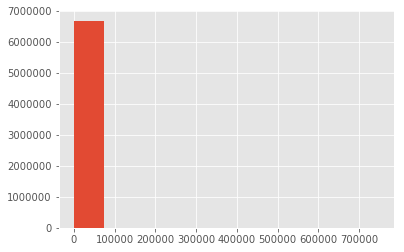

In [14]:
mask = (df.play_frequency > 3 )
df[mask].play_frequency.hist()
plt.show()

In [10]:
df.play_frequency.describe()

count    3.360585e+07
mean     4.366280e+00
std      2.080547e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      7.477590e+05
Name: play_frequency, dtype: float64

### More than half of songs were played only once

In [25]:
2.201484e+06 /3.360585e+07

0.06550895156646834

In [26]:
mask = (df.play_frequency > 3) & (df.play_frequency< 10)
df[mask].play_frequency.describe()

count    4.211703e+06
mean     5.670436e+00
std      1.622774e+00
min      4.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      9.000000e+00
Name: play_frequency, dtype: float64

In [24]:
mask = df.play_frequency > 10
df[mask].play_frequency.describe()

count    2.201484e+06
mean     3.773458e+01
std      8.121187e+02
min      1.100000e+01
25%      1.300000e+01
50%      1.800000e+01
75%      3.000000e+01
max      7.477590e+05
Name: play_frequency, dtype: float64

In [81]:
mask = df.uid == 0
df[mask].play_frequency.sum()

1161960

In [85]:
print df[(df.song_id == 0) | (df.song_id == 1) |(df.song_id == -1)].play_frequency.sum()

12664767


In [83]:
df[df.isnull().any(axis = 1)].play_frequency.sum() 

0

In [77]:
df[df.isnull().any(axis = 1)].head()

,uid,song_id,play_frequency
61343,168578562.0,NaN,37
109236,NaN,0.0,8115
243795,169023469.0,NaN,327
245143,169031088.0,NaN,11
245724,168917497.0,NaN,6


In [63]:
df.play_frequency.sum()

165111896

In [86]:
1.0 * (1162050 + 12664767 + 18379337 ) /165111896 * 100

19.505653305561946

In [79]:
1.0 * 18379337 /165111896 * 100

11.131443248643938

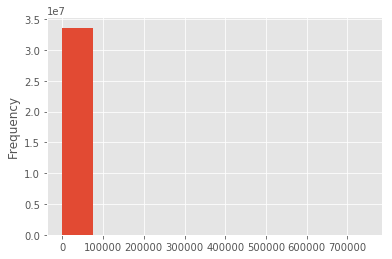

In [87]:
df.play_frequency.plot('hist')

In [28]:
play_freq = df.groupby('play_frequency').size()

In [31]:
play_freq = play_freq.apply(lambda x: x/3.360585e+07)

In [33]:
play_freq.head()

play_frequency
1    0.567523
2    0.163081
3    0.070802
4    0.041724
5    0.025421
dtype: float64

### Play frequency by users

In [34]:
user_play_freq = pd.read_csv("user_play_freq.csv")

In [35]:
user_play_freq.describe()

,uid,play_frequency
count,5.998070e+05,5.998080e+05
mean,1.673743e+08,2.752746e+02
std,1.043471e+07,2.809962e+04
min,0.000000e+00,1.000000e+00
25%,1.680303e+08,9.000000e+00
50%,1.684861e+08,4.100000e+01
75%,1.687711e+08,1.740000e+02
max,1.692623e+08,1.833250e+07


### Clean data 

In [151]:
df = pd.read_csv("play_freq.csv")

In [152]:
df.dropna(inplace= True)

In [153]:
mask1 = df.uid == 0 # mask for invalid uid

In [154]:
mask2 = (df.song_id == 0) | (df.song_id == 1) |(df.song_id == -1) # mask for invalid song_id

In [155]:
mask = ~(mask1 | mask2)

In [41]:
df.shape

(33605852, 3)

In [156]:
df = df[mask]

In [157]:
df.shape

(33400166, 3)

In [44]:
df.describe()

,uid,song_id,play_frequency
count,3.340017e+07,3.340017e+07,3.340017e+07
mean,1.605094e+08,6.155927e+06,3.984082e+00
std,3.336365e+07,7.138677e+06,3.996464e+01
min,1.233300e+04,1.400000e+01,1.000000e+00
25%,1.679196e+08,7.928260e+05,1.000000e+00
50%,1.683411e+08,4.304595e+06,1.000000e+00
75%,1.687034e+08,7.010594e+06,3.000000e+00
max,1.692623e+08,2.147484e+09,7.360900e+04


In [82]:
play_freq = df.groupby('play_frequency').size()

In [83]:
play_freq = play_freq.apply(lambda x: x/3.340017e+07)

In [84]:
play_freq.head()

play_frequency
1    0.570389
2    0.163669
3    0.070167
4    0.041749
5    0.025402
dtype: float64

In [85]:
play_freq = play_freq.to_frame()

In [86]:
play_freq.columns = ['percentage']

In [87]:
play_freq['cumulative_percentage'] = play_freq.cumsum()

In [88]:
play_freq.head(20)

,percentage,cumulative_percentage
play_frequency,,
1,0.570389,0.570389
2,0.163669,0.734058
3,0.070167,0.804225
4,0.041749,0.845974
5,0.025402,0.871377
6,0.022140,0.893516
7,0.013915,0.907431
8,0.011685,0.919116
9,0.009881,0.928997


In [92]:
import matplotlib.pyplot as plt
% matplotlib inline

In [90]:
type(play_freq.percentage)

pandas.core.series.Series

In [97]:
play_freq.percentage.describe()

count    2.422000e+03
mean     4.128819e-04
std      1.219729e-02
min      2.993997e-08
25%      2.993997e-08
50%      5.987993e-08
75%      3.892196e-07
max      5.703892e-01
Name: percentage, dtype: float64

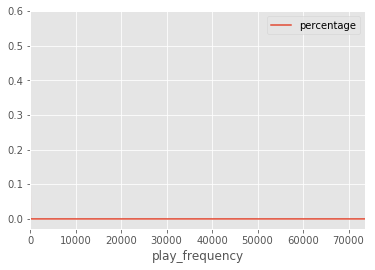

In [96]:

play_freq.plot(kind = "line", y = "percentage", use_index= True)
plt.show()

In [100]:
play_freq.reset_index(level=0, inplace=True)

In [111]:
play_freq.head(20)

,play_frequency,percentage,cumulative_percentage
0,1,0.570389,0.570389
1,2,0.163669,0.734058
2,3,0.070167,0.804225
3,4,0.041749,0.845974
4,5,0.025402,0.871377
5,6,0.022140,0.893516
6,7,0.013915,0.907431
7,8,0.011685,0.919116
8,9,0.009881,0.928997
9,10,0.007715,0.936713


### Convert play_frequency to rating/utility 

In [158]:
rating1 = df.play_frequency == 1

In [159]:
rating2 = (df.play_frequency > 1) & (df.play_frequency < 12)

In [160]:
rating3 = (df.play_frequency > 11) & (df.play_frequency < 22)

In [161]:
rating4 = (df.play_frequency > 21) & (df.play_frequency < 32)

In [162]:
rating5 = df.play_frequency > 31

In [163]:
df_rating = df.rename(columns ={ "play_frequency": "rating"})

In [164]:
df_rating.head()

,uid,song_id,rating
0,168529700.0,4068248.0,2
1,168529682.0,1719574.0,8
2,168529704.0,23491875.0,1
3,153901397.0,4310520.0,3
4,168529900.0,4117304.0,3


In [167]:
df_rating.loc[rating1,"rating"] = 1

In [168]:
df_rating.loc[rating2,"rating"] = 2

In [169]:
df_rating.loc[rating3,"rating"] = 3

In [170]:
df_rating.loc[rating4,"rating"] = 4

In [171]:
df_rating.loc[rating5,"rating"] = 5

In [172]:
df_rating.describe()

,uid,song_id,rating
count,3.340017e+07,3.340017e+07,3.340017e+07
mean,1.605094e+08,6.155927e+06,1.525855e+00
std,3.336365e+07,7.138677e+06,7.403400e-01
min,1.233300e+04,1.400000e+01,1.000000e+00
25%,1.679196e+08,7.928260e+05,1.000000e+00
50%,1.683411e+08,4.304595e+06,1.000000e+00
75%,1.687034e+08,7.010594e+06,2.000000e+00
max,1.692623e+08,2.147484e+09,5.000000e+00


In [179]:
df_rating.head()

,uid,song_id,rating
0,168529700.0,4068248.0,2
1,168529682.0,1719574.0,2
2,168529704.0,23491875.0,1
3,153901397.0,4310520.0,2
4,168529900.0,4117304.0,2


In [173]:
rating_freq = df_rating.groupby("rating").size()

In [174]:
rating_freq = rating_freq.apply(lambda x: x/3.340017e+07)

In [175]:
rating_freq = rating_freq.to_frame()

In [176]:
rating_freq.columns = ["percentage"]

In [177]:
rating_freq['cumulative_percentage'] = rating_freq.cumsum()

In [178]:
rating_freq.head()

,percentage,cumulative_percentage
rating,,
1,0.570389,0.570389
2,0.372384,0.942773
3,0.032333,0.975106
4,0.010770,0.985876
5,0.014124,1.000000


In [180]:
df_rating.to_csv("user_song_rating.csv")